# PROJECT 

# CO2 Emission By Vehicles:

# Problem Statement - To determine Amount of CO2 emissions by a vehicle depending on their various features.

In [165]:
#LIBRARIES USED.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [166]:
#Reading the csv file with the help of pandas library
data=pd.read_csv(r"C:\Users\lenovo\Desktop\python data set\CO2 Emissions_Canada.csv")
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [167]:
data.shape

(7385, 12)

In [168]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [169]:
data.describe(include="all")

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385,7385,7385,7385.000000,7385.000000,7385,7385,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
unique,42,2053,16,NaN,NaN,27,5,NaN,NaN,NaN,NaN,NaN
top,FORD,F-150 FFV 4X4,SUV - SMALL,NaN,NaN,AS6,X,NaN,NaN,NaN,NaN,NaN
freq,628,32,1217,NaN,NaN,1324,3637,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.160068,5.615030,NaN,NaN,12.556534,9.041706,10.975071,27.481652,250.584699
std,NaN,NaN,NaN,1.354170,1.828307,NaN,NaN,3.500274,2.224456,2.892506,7.231879,58.512679
min,NaN,NaN,NaN,0.900000,3.000000,NaN,NaN,4.200000,4.000000,4.100000,11.000000,96.000000
25%,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.500000,8.900000,22.000000,208.000000
50%,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.100000,8.700000,10.600000,27.000000,246.000000
75%,NaN,NaN,NaN,3.700000,6.000000,NaN,NaN,14.600000,10.200000,12.600000,32.000000,288.000000


In [170]:
#Ascending starting 5 rows
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [171]:
#Decending last 5 rows
data.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [172]:
#Accessing all columns of dataset
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [173]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [174]:
#Renaming columns
data=data.rename(columns={"Vehicle Class":"Vehicle_Class","Engine Size(L)":"Engine_Size","Fuel Type":"Fuel_Type","Fuel Consumption City (L/100 km)":"Fuel_Consumption_City","Fuel Consumption Hwy (L/100 km)":"Fuel_Consumption_Hwy","Fuel Consumption Comb (L/100 km)":"Fuel_Consumption_Comb_1","Fuel Consumption Comb (mpg)":"Fuel_Consumption_Comb_2","CO2 Emissions(g/km)":"CO2_Emissions"})

In [175]:
#finding the type of data
data.dtypes

Make                        object
Model                       object
Vehicle_Class               object
Engine_Size                float64
Cylinders                    int64
Transmission                object
Fuel_Type                   object
Fuel_Consumption_City      float64
Fuel_Consumption_Hwy       float64
Fuel_Consumption_Comb_1    float64
Fuel_Consumption_Comb_2      int64
CO2_Emissions                int64
dtype: object

In [176]:
#To check missing value
data.isnull().sum()

Make                       0
Model                      0
Vehicle_Class              0
Engine_Size                0
Cylinders                  0
Transmission               0
Fuel_Type                  0
Fuel_Consumption_City      0
Fuel_Consumption_Hwy       0
Fuel_Consumption_Comb_1    0
Fuel_Consumption_Comb_2    0
CO2_Emissions              0
dtype: int64

# Data Cleaning

#There is no missing value in data so no need to treat them.

# Dtype Conversion

#Converting categorial value into numerical(using LableEncoder)

In [177]:
data.Make=le.fit_transform(data.Make)
data.Model=le.fit_transform(data.Model)
data.Vehicle_Class=le.fit_transform(data.Vehicle_Class)
data.Transmission=le.fit_transform(data.Transmission)
data.Fuel_Type=le.fit_transform(data.Fuel_Type)

In [178]:
data.dtypes

Make                         int32
Model                        int32
Vehicle_Class                int32
Engine_Size                float64
Cylinders                    int64
Transmission                 int32
Fuel_Type                    int32
Fuel_Consumption_City      float64
Fuel_Consumption_Hwy       float64
Fuel_Consumption_Comb_1    float64
Fuel_Consumption_Comb_2      int64
CO2_Emissions                int64
dtype: object

In [179]:
data.shape

(7385, 12)

# Building Model On Data To Check Performance

#Splliting Data

In [180]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [181]:
x.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb_1,Fuel_Consumption_Comb_2
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27


In [182]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2_Emissions, dtype: int64

In [183]:
x.shape

(7385, 11)

In [184]:
y.shape

(7385,)

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [186]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5908, 11), (1477, 11), (5908,), (1477,))

# Linear Regression

In [187]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [188]:
lr.fit(x_train,y_train)

LinearRegression()

In [189]:
lr_pred=lr.predict(x_test)
lr_pred

array([315.49120871, 280.62364593, 353.95861795, ..., 250.31584122,
       270.58852323, 284.61640223])

In [190]:
lr.intercept_

161.26866843838823

In [191]:
lr.coef_

array([ 6.97103288e-02,  3.07243409e-04,  6.51107634e-01,  5.28810230e+00,
        5.62599546e+00, -5.86011272e-02,  7.36574616e+00, -1.25766586e+00,
        1.29715479e+00,  8.11832302e+00, -2.65822381e+00])

In [192]:
R2=lr.score(x_train,y_train)
R2

0.9175930692956535

In [193]:
AdjR2=1-(((1-R2)*(5908-1))/(5908-11-1))
AdjR2

0.9174393250219514

In [194]:
from sklearn import metrics

In [195]:
data_MAE=metrics.mean_absolute_error(y_test,lr_pred)
data_MAE

11.574795127140414

In [196]:
data_MSE=metrics.mean_squared_error(y_test,lr_pred)
data_MSE

318.68486287594106

In [197]:
data_RMSE=pow(data_MSE,0.5)
data_RMSE

17.851746773801747

# LASSO(L1)

In [198]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [199]:
lasso.fit(x_train,y_train)

Lasso()

In [200]:
lasso.coef_

array([ 7.98081176e-02,  5.15505276e-04,  6.50728850e-01,  3.48755906e+00,
        6.45849012e+00, -3.32585533e-02,  5.54823433e+00,  2.51575208e+00,
        2.75679179e+00,  1.89262526e+00, -2.96814343e+00])

In [201]:
l_p=lasso.predict(x_test)
l_p

array([314.34447885, 281.17287015, 354.1373663 , ..., 251.74711936,
       272.35289059, 284.90093354])

In [202]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.9165506753073067

In [203]:
l_adjR2=1-(((1-l_R2)*(5908-1)/(5908-11-1)))
l_adjR2

0.916394986268701

In [204]:
#MSE
l_MSE=metrics.mean_squared_error(y_test,l_p)
l_MSE

319.16105213040873

In [205]:
df=pd.DataFrame({"Importance":list(lasso.coef_),"columns":list(x)})

In [206]:
df

,Importance,columns
0,0.079808,Make
1,0.000516,Model
2,0.650729,Vehicle_Class
3,3.487559,Engine_Size
4,6.458490,Cylinders
5,-0.033259,Transmission
6,5.548234,Fuel_Type
7,2.515752,Fuel_Consumption_City
8,2.756792,Fuel_Consumption_Hwy
9,1.892625,Fuel_Consumption_Comb_1


In [207]:
features=df[df["Importance"]<1]
features

,Importance,columns
0,0.079808,Make
1,0.000516,Model
2,0.650729,Vehicle_Class
5,-0.033259,Transmission
10,-2.968143,Fuel_Consumption_Comb_2


In [208]:
data=data.drop(["Make","Model","Vehicle_Class","Transmission","Fuel_Consumption_Comb_2"],axis=1)
data

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb_1,CO2_Emissions
0,2.0,4,4,9.9,6.7,8.5,196
1,2.4,4,4,11.2,7.7,9.6,221
2,1.5,4,4,6.0,5.8,5.9,136
3,3.5,6,4,12.7,9.1,11.1,255
4,3.5,6,4,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...
7380,2.0,4,4,10.7,7.7,9.4,219
7381,2.0,4,4,11.2,8.3,9.9,232
7382,2.0,4,4,11.7,8.6,10.3,240
7383,2.0,4,4,11.2,8.3,9.9,232


# EDA (Exploratory Data Analysis)

# Data Visualization

# Correletion Map

In [209]:
cr=data.corr()
cr

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb_1,CO2_Emissions
Engine_Size,1.000000,0.927653,0.058296,0.831379,0.761526,0.817060,0.851145
Cylinders,0.927653,1.000000,0.125175,0.800702,0.715252,0.780534,0.832644
Fuel_Type,0.058296,0.125175,1.000000,-0.075605,-0.129812,-0.095539,0.100306
Fuel_Consumption_City,0.831379,0.800702,-0.075605,1.000000,0.948180,0.993810,0.919592
Fuel_Consumption_Hwy,0.761526,0.715252,-0.129812,0.948180,1.000000,0.977299,0.883536
Fuel_Consumption_Comb_1,0.817060,0.780534,-0.095539,0.993810,0.977299,1.000000,0.918052
CO2_Emissions,0.851145,0.832644,0.100306,0.919592,0.883536,0.918052,1.000000


# Heatmap

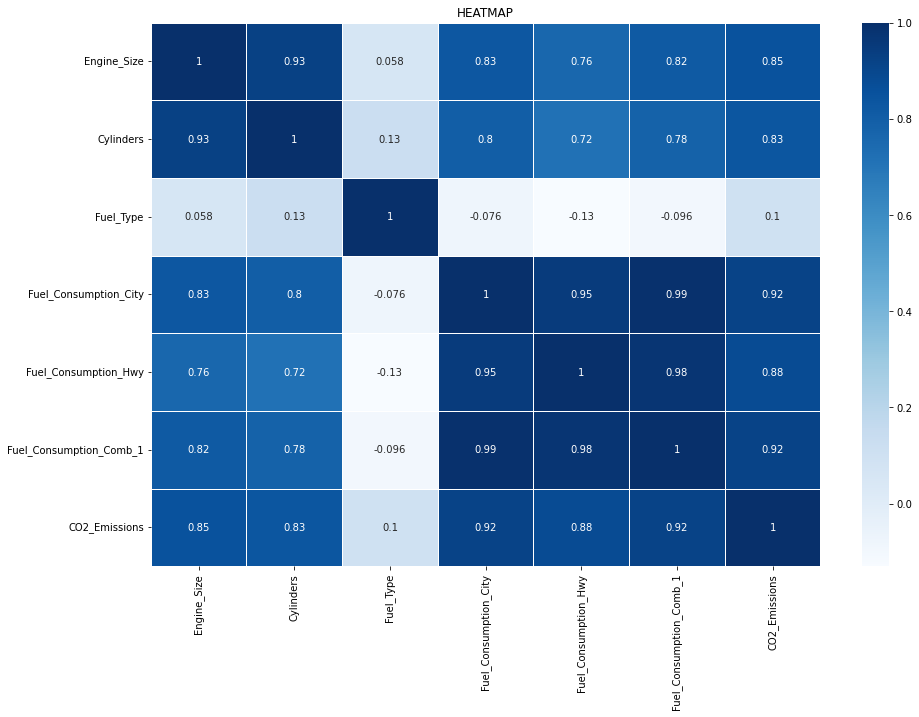

In [210]:
plt.figure(figsize=(15,10))
hearmap=sns.heatmap(cr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("HEATMAP")
plt.show()

#Split the data to numerical data and categorical data

In [211]:
temp = []
temp2 = []
for i in data:
  if data[i].dtype=="float64" or data[i].dtype=="int64":
    temp.append(data[i])
  else:
    temp2.append(data[i])
    
df_cat = pd.DataFrame(temp2)
df_num = pd.DataFrame(temp)
df_num = df_num.T
df_cat = df_cat.T

#Ploting the Numerical Data

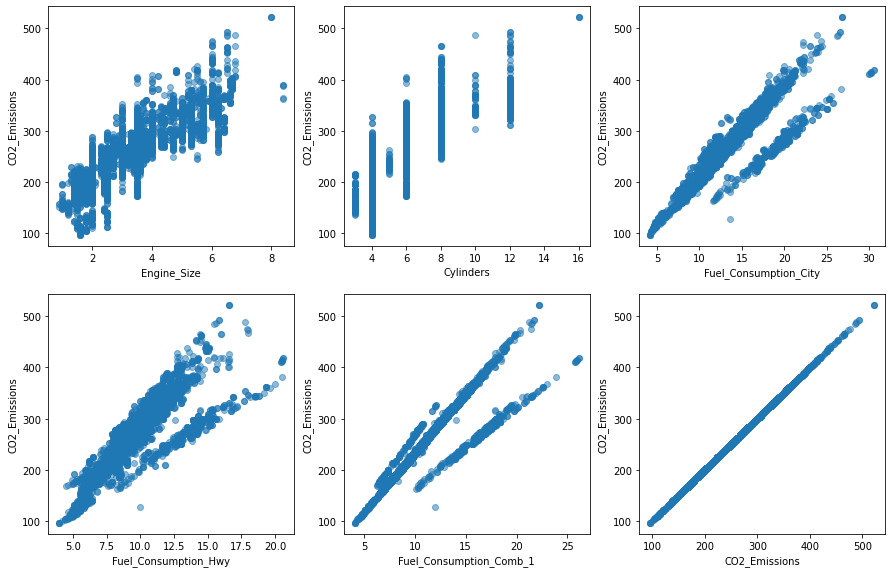

In [212]:
plt.figure(figsize = (15,15))

for  i in enumerate(df_num):
    
    plt.subplot(3,3,i[0]+1)
    x = df_num[i[1]]
    y=df_num['CO2_Emissions']

    plt.xlabel(i[1])
    plt.ylabel("CO2_Emissions")
  
    plt.scatter(x, y , alpha=0.5)  
   

# Outlier Treatment

<AxesSubplot:>

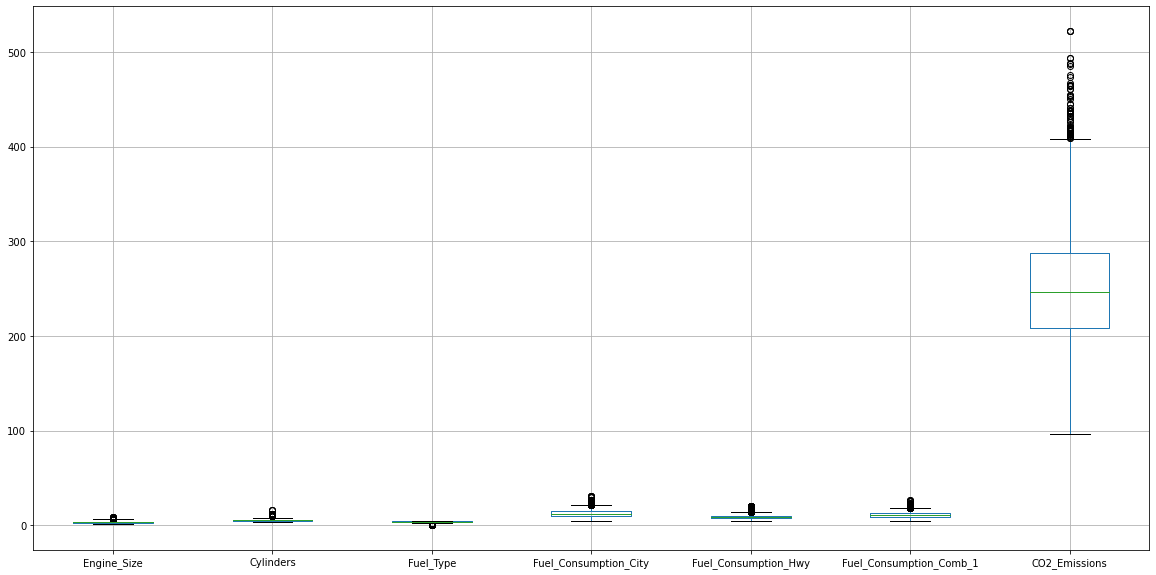

In [213]:
data.boxplot(figsize=(20,10))

# Outlier Treatment For Column "Engine_Size"

<AxesSubplot:>

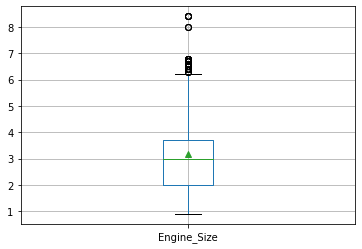

In [215]:
#boxplot
data.boxplot(column="Engine_Size",showmeans=True)

<AxesSubplot:>

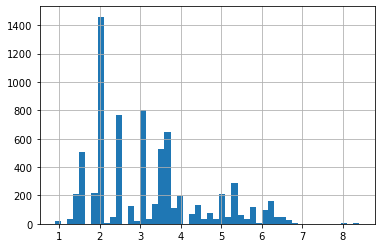

In [216]:
data.Engine_Size.hist(bins=50)

In [217]:
data.Engine_Size.describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine_Size, dtype: float64

<AxesSubplot:xlabel='Engine_Size', ylabel='Density'>

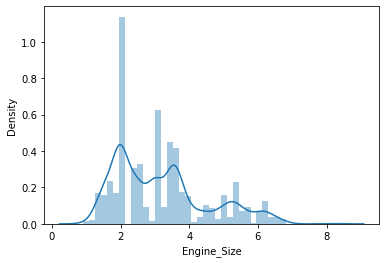

In [218]:
sns.distplot(data["Engine_Size"])

#Data is normally distributed so I go with Standard deviation method.

In [219]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u1=data["Engine_Size"].mean()+3*data["Engine_Size"].std()
u1

7.222579071493819

In [220]:
data.loc[data["Engine_Size"]>7,"Engine_Size"]=7

<AxesSubplot:>

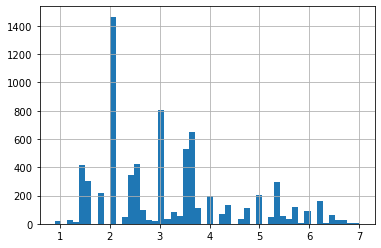

In [221]:
data.Engine_Size.hist(bins=50)

<AxesSubplot:xlabel='Engine_Size', ylabel='Density'>

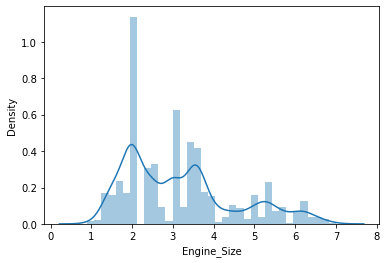

In [222]:
sns.distplot(data["Engine_Size"])

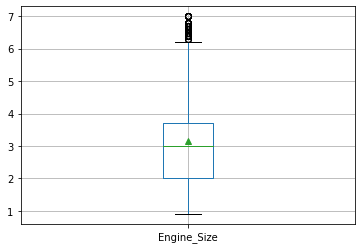

In [223]:
box=data.boxplot(column="Engine_Size",showmeans=True)

# Outlier Treatment For Column "Cylinders"

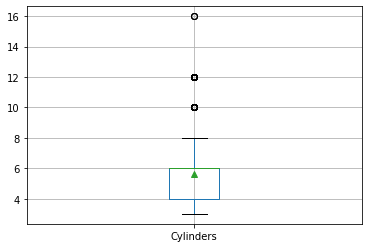

In [224]:
#boxplot
box=data.boxplot(column="Cylinders",showmeans=True)

<AxesSubplot:>

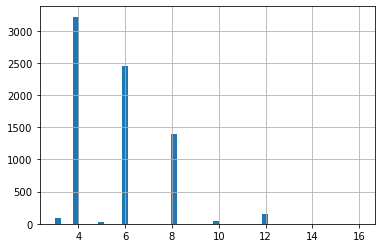

In [225]:
data.Cylinders.hist(bins=50)

In [226]:
data.Cylinders.describe()

count    7385.000000
mean        5.615030
std         1.828307
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        16.000000
Name: Cylinders, dtype: float64

<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

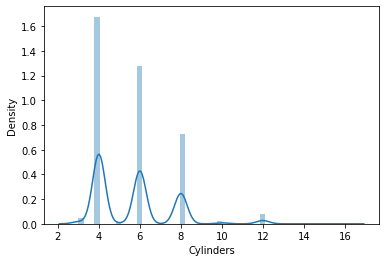

In [227]:
sns.distplot(data["Cylinders"])

#Data is skewed one so I go with iqr method.

In [228]:
iqr1=data.Cylinders.quantile(0.75)-data.Cylinders.quantile(0.25)
iqr1

2.0

In [229]:
u2=data["Cylinders"].quantile(0.75)+3*iqr1
l2=data["Cylinders"].quantile(0.25)-3*iqr1
print(u2,l2)

12.0 -2.0


In [230]:
data.loc[data["Cylinders"]>12.0,"Cylinders"]=12.0

<AxesSubplot:>

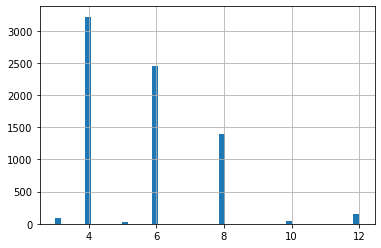

In [231]:
data.Cylinders.hist(bins=50)

<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

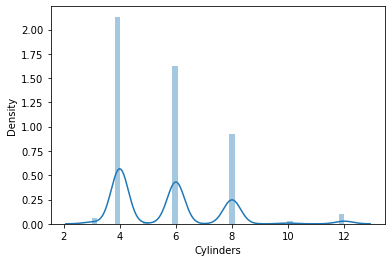

In [232]:
sns.distplot(data["Cylinders"])

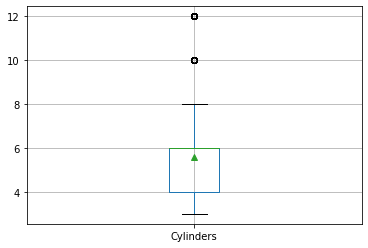

In [233]:
box=data.boxplot(column="Cylinders",showmeans=True)

# Outlier Treatment For Column "Fuel_Consumption_City"

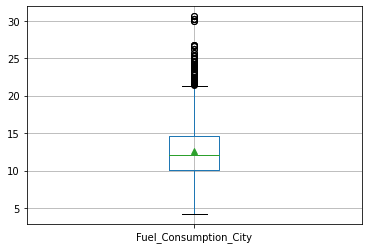

In [234]:
#boxplot
box=data.boxplot(column="Fuel_Consumption_City",showmeans=True)

<AxesSubplot:>

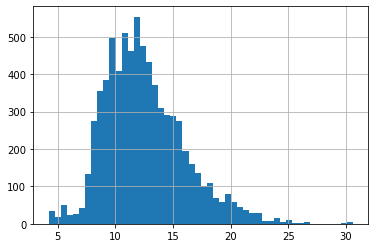

In [235]:
data.Fuel_Consumption_City.hist(bins=50)

In [236]:
data.Fuel_Consumption_City.describe()

count    7385.000000
mean       12.556534
std         3.500274
min         4.200000
25%        10.100000
50%        12.100000
75%        14.600000
max        30.600000
Name: Fuel_Consumption_City, dtype: float64

<AxesSubplot:xlabel='Fuel_Consumption_City', ylabel='Density'>

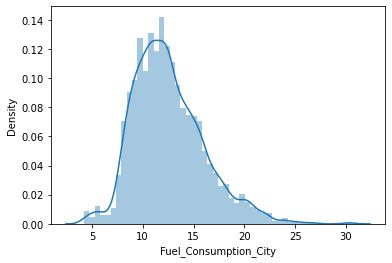

In [237]:
sns.distplot(data["Fuel_Consumption_City"])

#Data is normally distributed so I go with Standard deviation method.

In [238]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u3=data["Fuel_Consumption_City"].mean()+3*data["Fuel_Consumption_City"].std()
u3

23.05735575714288

In [239]:
data.loc[data["Fuel_Consumption_City"]>23,"Fuel_Consumption_City"]=23

<AxesSubplot:>

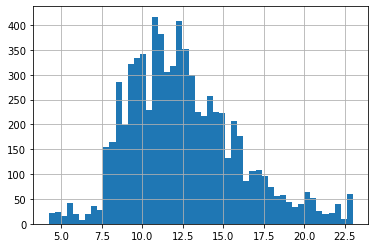

In [240]:
data.Fuel_Consumption_City.hist(bins=50)

<AxesSubplot:xlabel='Fuel_Consumption_City', ylabel='Density'>

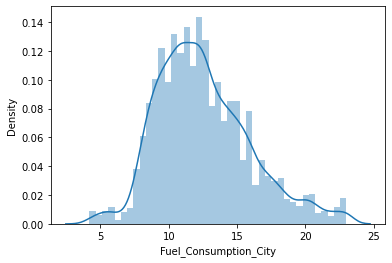

In [241]:
sns.distplot(data["Fuel_Consumption_City"])

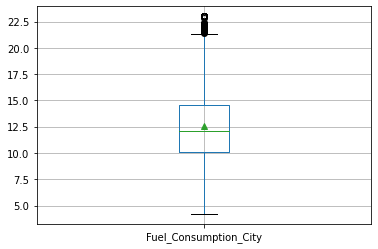

In [242]:
box=data.boxplot(column="Fuel_Consumption_City",showmeans=True)

# Outlier Treatment For Column "Fuel_Consumption_Hwy"

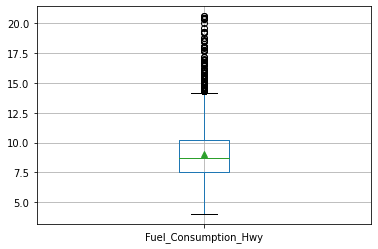

In [243]:
#boxplot
box=data.boxplot(column="Fuel_Consumption_Hwy",showmeans=True)

<AxesSubplot:>

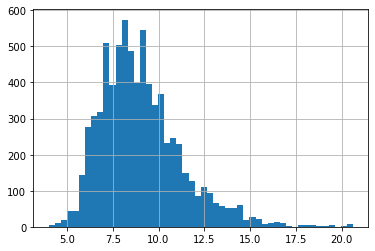

In [244]:
data.Fuel_Consumption_Hwy.hist(bins=50)

In [245]:
data.Fuel_Consumption_Hwy.describe()

count    7385.000000
mean        9.041706
std         2.224456
min         4.000000
25%         7.500000
50%         8.700000
75%        10.200000
max        20.600000
Name: Fuel_Consumption_Hwy, dtype: float64

<AxesSubplot:xlabel='Fuel_Consumption_Hwy', ylabel='Density'>

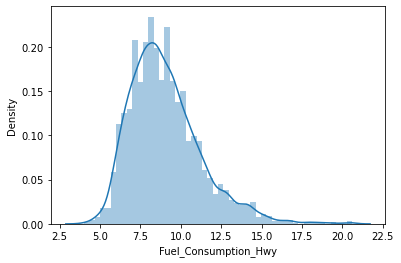

In [246]:
sns.distplot(data["Fuel_Consumption_Hwy"])

#Data is normally distributed so I go with Standard deviation method.

In [247]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u4=data["Fuel_Consumption_Hwy"].mean()+3*data["Fuel_Consumption_Hwy"].std()
u4

15.715075303063127

In [248]:
data.loc[data["Fuel_Consumption_Hwy"]>15,"Fuel_Consumption_Hwy"]=15

<AxesSubplot:>

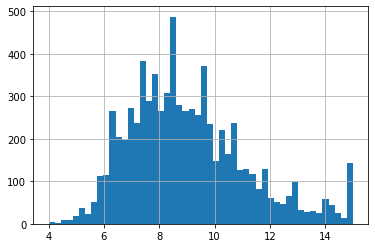

In [249]:
data.Fuel_Consumption_Hwy.hist(bins=50)

<AxesSubplot:xlabel='Fuel_Consumption_Hwy', ylabel='Density'>

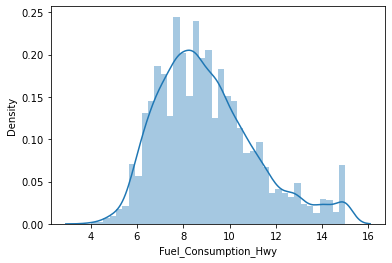

In [250]:
sns.distplot(data["Fuel_Consumption_Hwy"])

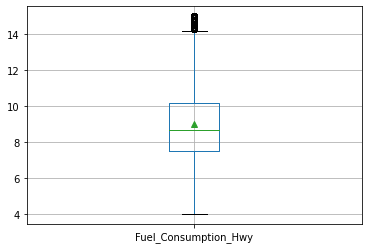

In [251]:
box=data.boxplot(column="Fuel_Consumption_Hwy",showmeans=True)

# Outlier Treatment For column "Fuel_Consumption_Comb_1"

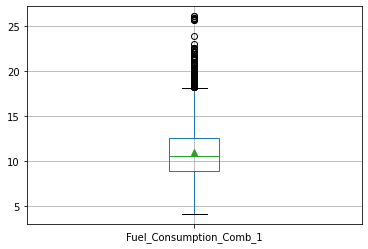

In [252]:
#boxplot
box=data.boxplot(column="Fuel_Consumption_Comb_1",showmeans=True)

<AxesSubplot:>

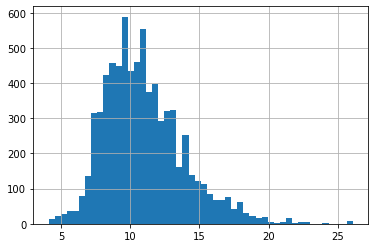

In [253]:
data.Fuel_Consumption_Comb_1.hist(bins=50)

In [254]:
data.Fuel_Consumption_Comb_1.describe()

count    7385.000000
mean       10.975071
std         2.892506
min         4.100000
25%         8.900000
50%        10.600000
75%        12.600000
max        26.100000
Name: Fuel_Consumption_Comb_1, dtype: float64

<AxesSubplot:xlabel='Fuel_Consumption_Comb_1', ylabel='Density'>

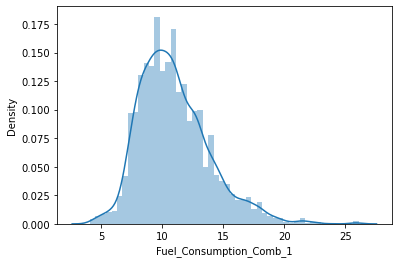

In [255]:
sns.distplot(data["Fuel_Consumption_Comb_1"])

#Data is normally distributed so I go with Standard deviation method.

In [256]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u5=data["Fuel_Consumption_Comb_1"].mean()+3*data["Fuel_Consumption_Comb_1"].std()
u5

19.652589998742748

In [257]:
data.loc[data["Fuel_Consumption_Comb_1"]>19,"Fuel_Consumption_Comb_1"]=19

<AxesSubplot:>

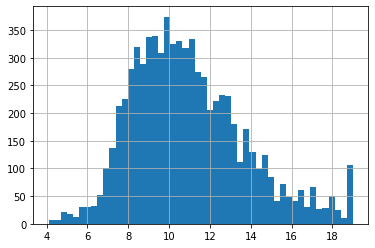

In [258]:
data.Fuel_Consumption_Comb_1.hist(bins=50)

<AxesSubplot:xlabel='Fuel_Consumption_Comb_1', ylabel='Density'>

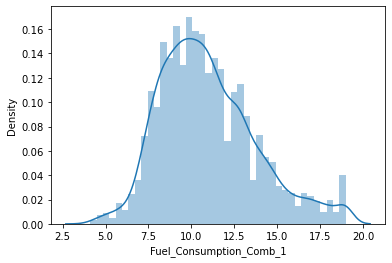

In [259]:
sns.distplot(data["Fuel_Consumption_Comb_1"])

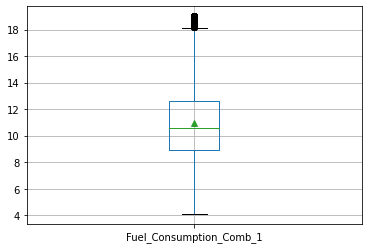

In [260]:
box=data.boxplot(column="Fuel_Consumption_Comb_1",showmeans=True)

# Outlier Treatment For Column "CO2_Emissions"

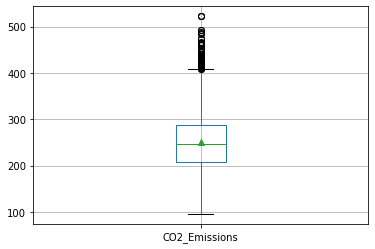

In [261]:
#boxplot
box=data.boxplot(column="CO2_Emissions",showmeans=True)

<AxesSubplot:>

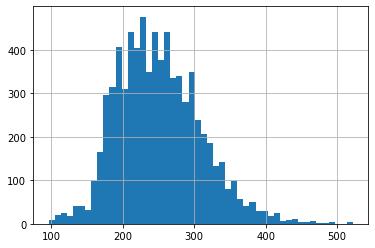

In [262]:
data.CO2_Emissions.hist(bins=50)

In [263]:
data.CO2_Emissions.describe()

count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2_Emissions, dtype: float64

<AxesSubplot:xlabel='CO2_Emissions', ylabel='Density'>

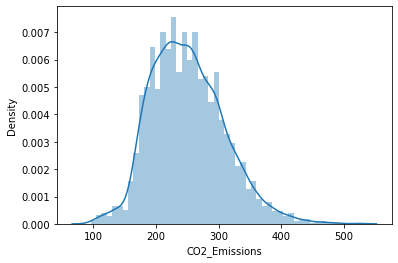

In [264]:
sns.distplot(data["CO2_Emissions"])

#Data is normally distributed so I go with Standard deviation method.

In [265]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u7=data["CO2_Emissions"].mean()+3*data["CO2_Emissions"].std()
u7

426.1227368968281

In [266]:
data.loc[data["CO2_Emissions"]>426,"CO2_Emissions"]=426

<AxesSubplot:>

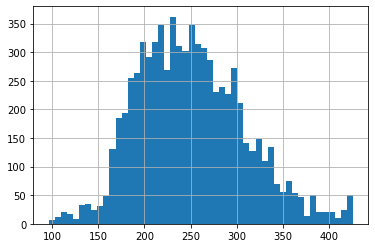

In [267]:
data.CO2_Emissions.hist(bins=50)

<AxesSubplot:xlabel='CO2_Emissions', ylabel='Density'>

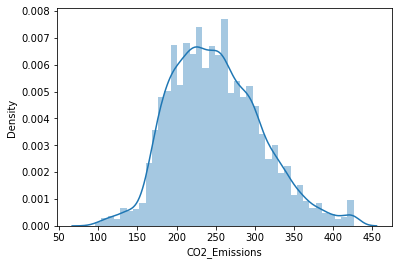

In [268]:
sns.distplot(data["CO2_Emissions"])

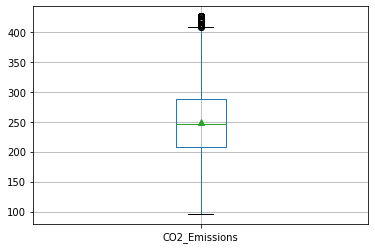

In [269]:
box=data.boxplot(column="CO2_Emissions",showmeans=True)

# SKEWNESS TREATMENT

In [270]:
data.skew()

Engine_Size                0.786873
Cylinders                  1.068941
Fuel_Type                 -1.801497
Fuel_Consumption_City      0.646604
Fuel_Consumption_Hwy       0.741000
Fuel_Consumption_Comb_1    0.666378
CO2_Emissions              0.436536
dtype: float64

# Range of skewness is between 1 to -1 so need to do skewness treatment

# Model On Data To Check Performance

In [271]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1]

In [272]:
x1.head()

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb_1
0,2.0,4,4,9.9,6.7,8.5
1,2.4,4,4,11.2,7.7,9.6
2,1.5,4,4,6.0,5.8,5.9
3,3.5,6,4,12.7,9.1,11.1
4,3.5,6,4,12.1,8.7,10.6


In [273]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=10)

In [274]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((5908, 6), (1477, 6), (5908,), (1477,))

# Linear Regression

In [275]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [276]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [277]:
lr_pred=lr.predict(x1_test)
lr_pred

array([313.30655198, 276.66695196, 351.22212874, ..., 241.78239154,
       261.79735772, 279.04652021])

In [278]:
lr.intercept_

10.371577141306147

In [279]:
lr.coef_

array([ 6.13373008,  3.17272521,  9.66672906, -0.89158057,  2.99744215,
       14.20002529])

In [280]:
lr_R2=lr.score(x1_train,y1_train)
lr_R2

0.9060095082258242

In [281]:
lr_AdjR2=1-(((1-lr_R2)*(5908-1))/(5908-6-1))
lr_AdjR2

0.9059139408727238

In [282]:
pred_data=lr.predict(x1_train)
pred_data

array([214.88403212, 151.0408141 , 140.51885216, ..., 346.18046295,
       231.09852514, 255.46929902])

In [283]:
mean_y=y1_train.mean()
print("mean is :",mean_y)

mean is : 250.61848341232226


In [284]:
SSE=np.sum(np.square(pred_data-y1_train))
SSE

1846083.6090730387

In [285]:
SSR=np.sum(np.square(pred_data-mean_y))
SSR

17795090.45253831

In [286]:
r2=SSR/(SSR+SSE)
r2

0.906009508225824

By calculation

In [287]:
#mean absolite error
error=y1_test-lr_pred
#error

In [288]:
error_a=np.abs(error)
#error_a

In [289]:
MAE=np.mean(error_a)
MAE

12.181036718127334

In [290]:
#mean square error
Error=error*error
#Error

In [291]:
MSE=np.mean(Error)
MSE

359.7774083007463

In [292]:
RMSE=np.sqrt(MSE)
RMSE

18.967799247692028

In [293]:
#mean absolute persentage error
MAPE=np.mean(error_a/y1_test)*100
MAPE

5.047661755547229

Using syntax

In [294]:
from sklearn import metrics

In [295]:
data_MAE=metrics.mean_absolute_error(y1_test,lr_pred)
data_MAE

12.181036718127318

In [296]:
data_MSE=metrics.mean_squared_error(y1_test,lr_pred)
data_MSE

359.77740830074583

In [297]:
data_RMSE=pow(data_MSE,0.5)
data_RMSE

18.967799247692017

# Lasso(L1)

In [298]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [299]:
lasso.fit(x1_train,y1_train)

Lasso()

In [300]:
lasso.coef_

array([4.37970402, 3.84805776, 8.26401456, 3.87232627, 5.13723927,
       7.01685675])

In [301]:
l_p=lasso.predict(x1_test)
#l_p

In [302]:
l_R2=lasso.score(x1_train,y1_train)
l_R2

0.9051084086196298

In [303]:
l_adjR2=1-(((1-l_R2)*(5908-1)/(5908-6-1)))
l_adjR2

0.9050119250493397

In [304]:
l_MSE=metrics.mean_squared_error(y1_test,l_p)
l_MSE

359.24591466784716

In [305]:
df=pd.DataFrame({"Importance":list(lasso.coef_),"columns":list(x1)})
df

,Importance,columns
0,4.379704,Engine_Size
1,3.848058,Cylinders
2,8.264015,Fuel_Type
3,3.872326,Fuel_Consumption_City
4,5.137239,Fuel_Consumption_Hwy
5,7.016857,Fuel_Consumption_Comb_1


In [306]:
df1=pd.DataFrame({"Actual":y1_test,"predicted":l_p})
df1

,Actual,predicted
5862,325,311.726369
2049,290,276.839326
4392,346,351.346533
4497,222,222.377694
4954,280,271.644255
...,...,...
4588,121,147.053219
6165,318,308.342661
5612,246,242.735136
1068,271,262.410055


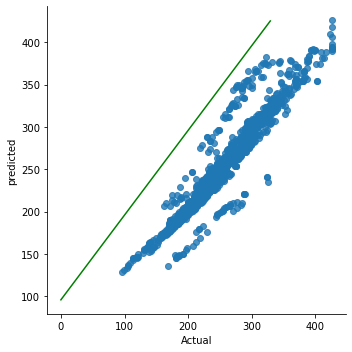

In [307]:
sns.lmplot(x="Actual",y="predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,color="green",linestyle="-")
plt.show()

# Ridge

In [308]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [309]:
rd.fit(x1_train,y1_train)

Ridge()

In [310]:
rd_pred=rd.predict(x1_test)
#rd_pred

In [311]:
rd_R2=rd.score(x1_train,y1_train)
rd_R2

0.9060091321168096

In [312]:
rd_adjR2=1-(((1-rd_R2)*(5908-1))/(5908-6-1))
rd_adjR2

0.9059135643812903

In [313]:
r_MSE=metrics.mean_squared_error(y1_test,rd_pred)
r_MSE

359.77065773231635

# RandomForestRegressor

In [314]:
from sklearn.ensemble import RandomForestRegressor

In [315]:
rfr=RandomForestRegressor()

In [316]:
rfr.fit(x1_train,y1_train)

RandomForestRegressor()

In [317]:
rfr_pred=rfr.predict(x1_test)
rfr_pred

array([324.27      , 291.50180952, 345.3145    , ..., 244.01166667,
       271.89009091, 293.48      ])

In [318]:
rfr_R2=rfr.score(x1_train,y1_train)
rfr_R2

0.9990901844399168

In [319]:
rfr_a_R2=1-(((1-rfr_R2)*(5908-1))/(5908-6-1))
rfr_a_R2

0.9990892593605472

In [320]:
rfr_MSE=metrics.mean_squared_error(y1_test,rfr_pred)
rfr_MSE

8.308166309996372

# XGB Regressor

In [321]:
import xgboost as xgb

In [322]:
xgb=xgb.XGBRegressor()

In [323]:
xgb.fit(x1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [324]:
xgb_pred=xgb.predict(x1_test)
xgb_pred

array([324.82642, 291.63943, 345.09555, ..., 242.88095, 271.9974 ,
       292.7113 ], dtype=float32)

In [325]:
xgb_R2=xgb.score(x1_train,y1_train)
xgb_R2

0.9988989838725202

In [326]:
xgb_a_R2=1-(((1-xgb_R2)*(5908-1))/(5908-6-1))
xgb_a_R2

0.9988978643848461

In [327]:
xgb_MSE=metrics.mean_squared_error(y1_test,xgb_pred)
xgb_MSE

7.936058665932632

In [328]:
list1=["linear","Lasso","Ridge","RandomForestRegressor","XGB Regressor"]
list2=[R2,l_R2,rd_R2,rfr_R2,xgb_R2]
list3=[AdjR2,l_adjR2,rd_adjR2,rfr_a_R2,xgb_a_R2]
list4=[MSE,l_MSE,r_MSE,rfr_MSE,xgb_MSE]

In [329]:
final_result=pd.DataFrame({"Modelname":list1,"R-Square":list2,"AdjR2":list3,"MSE":list4})
final_result

,Modelname,R-Square,AdjR2,MSE
0,linear,0.917593,0.917439,359.777408
1,Lasso,0.905108,0.905012,359.245915
2,Ridge,0.906009,0.905914,359.770658
3,RandomForestRegressor,0.999090,0.999089,8.308166
4,XGB Regressor,0.998899,0.998898,7.936059


# According to final result we can say XGB Regressor is best suited model for our data.